In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
X_train.head()

,duration,rating,first_week,second_week,third_week,Comedy,Kids & Family,Action & Adventure,Mystery & Suspense,Science Fiction & Fantasy,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Mini-Major,Major
0,112,41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1.0,0.0
1,114,90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
2,104,17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0.0,1.0
3,119,35,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0.0,1.0
4,95,69,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0


In [41]:
# This feature is dropped since there's only one element in this category, there's a non-zero probability of 
# a feature in the training dataset is equal to 0 for all observations.
X_train = X_train.drop(['Anime & Manga'], axis=1)
X_test = X_test.drop(['Anime & Manga'], axis=1)

# Neural Network

In [4]:
pipe = Pipeline([('scale', StandardScaler()), ('nn', MLPRegressor())])

In [12]:
grid = GridSearchCV(pipe, {'nn__hidden_layer_sizes': [(n,)*x for x in range(4, 10) for n in range(100, 450, 50)], 'nn__learning_rate_init': [0.01]}, scoring='r2', verbose=10, cv=3)
grid.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, score=0.25776670620035047, total=   6.0s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.3s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, score=0.27471476791520655, total=   6.3s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, score=0.020811359322699174, total=   5.6s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.9s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, score=0.2872543022544325, total=   7.2s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   25.1s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, score=0.25075218846633873, total=   7.6s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   32.7s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, score=0.04982393903648241, total=   7.7s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   40.4s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200), nn__learning_rate_init=0.01, score=0.2730727249097318, total=   8.5s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   48.9s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200), nn__learning_rate_init=0.01, score=0.2971882770558306, total=   7.9s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   56.8s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200), nn__learning_rate_init=0.01, score=0.06717233245292065, total=  11.5s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, score=0.3416606171300127, total=  18.0s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, score=0.44881948612910116, total=  12.7s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, score=0.16586465604399647, total=  10.7s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300), nn__learning_rate_init=0.01, score=0.37865882162463804, total=  13.9s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300), nn__learning_rate_init=0.01, score=0.45624875141352705, total=  14.8s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300), nn__learning_rate_init=0.01 
[

[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, score=0.49680136762220317, total=   7.7s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, score=0.038323370777758825, total=   6.3s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, score=0.36197534388178465, total=   9.6s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, score=0.45951861005911054, total=   9.9s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, score=0.5064959560437577, tot

[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, score=0.4588916613928711, total=   1.6s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, score=0.490395686362988, total=   1.0s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, score=0.4233779290450428, total=   5.5s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, score=0.3849190924297078, total=   2.0s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(200, 200, 200, 

[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, score=0.21187212141154932, total=   4.0s
[CV] nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, score=0.40613219704858894, total=   2.3s
[CV] nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, score=-0.07791103777319663, total=   3.5s
[CV] nn__hidden_layer_sizes=(400, 400, 400, 400, 400, 400, 400, 400, 400), nn__learning_rate_init=0.01 
[CV]  nn__hidden_layer_sizes=(400, 400, 400, 400, 400, 400, 400, 400, 400), nn__learning_rate_init=0.01, score=-0.30033221915955366, total=   2.8s
[CV] nn__hidden_layer_sizes=(400, 400, 400, 400, 400, 400, 400, 400, 400), nn__learning_rate_init=0.01

[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed: 16.8min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('nn', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_i...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'nn__hidden_layer_sizes': [(100, 100, 100, 100), (150, 150, 150, 150), (200, 200, 200, 200), (250, 250, 250, 250), (300, 300, 300, 300), (350, 350, 350, 350), (400, 400, 400, 400), (100, 100, 100, 100, 100), (150, 150, 150, 150, 150), (200, 200, 200, 200, 200), (250, 250, 250, 250, 250),...0, 350, 350, 350), (400, 400, 400, 400, 400, 400, 400, 400, 400)], 'nn__learning_rate_init': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_tra

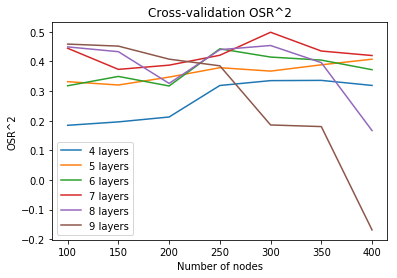

In [14]:
plt.plot(range(100, 450, 50), grid.cv_results_['mean_test_score'].reshape(6,7).transpose())
plt.legend([str(i) + ' layers' for i in range(4,10)])
plt.xlabel('Number of nodes')
plt.ylabel('OSR^2')
plt.title('Cross-validation OSR^2')
plt.show()

In [15]:
grid.best_estimator_.get_params()

{'memory': None,
 'nn': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300),
        learning_rate='constant', learning_rate_init=0.01, max_iter=200,
        momentum=0.9, nesterovs_momentum=True, power_t=0.5,
        random_state=None, shuffle=True, solver='adam', tol=0.0001,
        validation_fraction=0.1, verbose=False, warm_start=False),
 'nn__activation': 'relu',
 'nn__alpha': 0.0001,
 'nn__batch_size': 'auto',
 'nn__beta_1': 0.9,
 'nn__beta_2': 0.999,
 'nn__early_stopping': False,
 'nn__epsilon': 1e-08,
 'nn__hidden_layer_sizes': (300, 300, 300, 300, 300, 300, 300),
 'nn__learning_rate': 'constant',
 'nn__learning_rate_init': 0.01,
 'nn__max_iter': 200,
 'nn__momentum': 0.9,
 'nn__nesterovs_momentum': True,
 'nn__power_t': 0.5,
 'nn__random_state': None,
 'nn__shuffle': True,
 'nn__solver': 'adam',
 'nn__tol': 0.0001,
 'nn__validation

In [34]:
y_pred = grid.predict(X_test)

print('OSR2 on test data: ', grid.score(X_test, y_test))
print('MAE on test data: ', mean_absolute_error(y_test, y_pred))
print('RMSE on test data: ', np.sqrt(mean_squared_error(y_test, y_pred)))

OSR2 on test data:  0.4947735408999542
MAE on test data:  27751705.805033427
RMSE on test data:  48493358.75387004


## With PCA

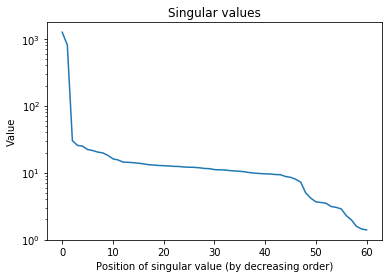

In [42]:
pca = PCA()
pca.fit(X_train, y_train)
plt.semilogy(pca.singular_values_)
plt.title('Singular values')
plt.xlabel('Position of singular value (by decreasing order)')
plt.ylabel('Value')
plt.show()

As we can see, the first 4 or 5 values are very high compared to the following ones. However, we may want too keep up to the first 50 features so as to not lose information.

In [48]:
pipe = Pipeline([('pca', PCA()), ('scale', StandardScaler()), ('nn', MLPRegressor())])
params = {
    'pca__n_components': np.arange(10, 60, 10),
    'nn__hidden_layer_sizes': [(n,)*x for x in range(2, 8) for n in range(50, 400, 50)],
    'nn__learning_rate_init': [0.01],
}

In [49]:
grid = GridSearchCV(pipe, params, scoring='r2', verbose=10, cv=3)
grid.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 210 candidates, totalling 630 fits
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.28847451307698646, total=   1.6s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.3790301298351382, total=   1.7s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.32474224458042844, total=   1.7s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.8s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4183634694010716, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.5s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.3753030351439083, total=   1.7s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.2s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4129191264397327, total=   1.7s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   11.9s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.38948355010835733, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   13.7s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.35184813103092516, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.6s remaining:    0.0s


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.37832825286226823, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.3736239070250764, total=   1.9s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.3903159575070405, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.3963948648352855, total=   1.7s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.37849101437444066, total=   2.0s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.40486672461977224, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.3351495405539924, total=   2.1s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.40604071715303724, total=   2.9s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.45260370967229857, total=   2.8s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.44193208405575823, total=   3.1s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.44345679329316245, total=   3.2s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4583862852599938, total=   2.9s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.47136441113513194, total=   2.7s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4579666438118657, total=   2.8s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4792209612739029, total=   3.1s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4817771735789893, total=   3.1s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4606919745981922, total=   3.3s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4964412839154262, total=   3.0s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.47197685166138703, total=   2.9s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4491003251976988, total=   3.5s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4871433656794597, total=   3.7s
[CV] nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4280987806988037, total=   3.3s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4205583323052018, total=   4.3s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4623280723408323, total=   3.9s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4517370211412175, total=   3.8s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4580748724023356, total=   4.1s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4700690755750655, total=   3.9s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.48231347185978213, total=   4.4s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.46731845355135804, total=   4.3s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4937684317658618, total=   4.2s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4971959451891329, total=   4.0s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4742021830562937, total=   4.3s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5121698300415037, total=   4.6s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4882691122604803, total=   4.3s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.46374791665188164, total=   4.6s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5098983287992023, total=   4.5s
[CV] nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.456456398697505, total=   4.6s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.42408522570848617, total=   5.5s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4677281002110357, total=   5.2s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4540291224970795, total=   5.3s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4673552880982341, total=   5.3s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=20, score=0.48378525955503227, total=   5.1s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4897899345945317, total=   5.2s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4723904408028543, total=   6.1s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5071021979876429, total=   6.5s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5043959928248556, total=   5.7s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.48119917902775866, total=   5.4s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5189299551498977, total=   5.4s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4967642684991661, total=   5.4s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.47191599057892064, total=   6.4s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5183573826472037, total=   5.5s
[CV] nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.46896992270891324, total=   5.9s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=10, score=0.42672622872772203, total=   7.0s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4687944476536502, total=   7.2s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4543713552948929, total=   7.3s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4642402531019827, total=   7.4s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=20, score=0.48222612941839915, total=   8.2s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=20, score=0.49047998168443807, total=   8.0s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4780118352802004, total=   7.6s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5059941334141353, total=   7.8s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5044235331973007, total=   7.2s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4823480772832298, total=   7.3s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5238340353960431, total=   7.6s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4987395888453018, total=   7.4s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.47359661760427385, total=   7.5s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5229865104025926, total=   7.8s
[CV] nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.47825638613510324, total=   7.2s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.42794304916280446, total=   8.5s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4728858189945938, total=   8.7s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4548210011396656, total=   8.8s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.46738294907821176, total=  10.8s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4962056444760766, total=   8.7s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4851609604991054, total=   8.8s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4786435012539707, total=  11.2s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5104485231906493, total=  12.4s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5028269234267089, total=  14.7s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4848209789984874, total=  13.1s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5285204433603541, total=  11.9s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5036868837322299, total=  11.8s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4767315453888672, total=  10.2s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5264061124686457, total=  10.7s
[CV] nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.478971983318496, total=  10.2s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=10, score=0.429436743720099, total=  11.4s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=10, score=0.47369651663331924, total=  11.5s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4571329240823355, total=  11.5s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4696910238410379, total=  12.0s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=20, score=0.49467593932644915, total=  11.9s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4933237333296785, total=  11.5s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4787158280226306, total=  11.8s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5127984646012924, total=  11.9s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5107125828463328, total=  11.9s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.48577945381561083, total=  12.3s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5310327987908645, total=  12.1s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5058027586858918, total=  12.2s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4791895110429758, total=  14.1s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5279891072014766, total=  13.0s
[CV] nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4800148185336679, total=  12.2s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.45606171049549826, total=   2.3s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.49466239918994914, total=   2.3s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.472486740231689, total=   2.3s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4871731330632836, total=   2.5s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5075441341291067, total=   2.5s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5083310986870683, total=   2.5s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4872582934759301, total=   2.4s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5339892168966723, total=   2.4s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5131210693493198, total=   2.4s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.49541864245157985, total=   2.4s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5492019593901719, total=   2.4s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.514937211859104, total=   2.5s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4902032029921052, total=   2.6s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5419256452441332, total=   2.5s
[CV] nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4846889376532659, total=   2.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.482794634121281, total=   4.1s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5233846211023978, total=   4.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.49126909221815607, total=   4.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4965287026975391, total=   4.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5258536317966149, total=   4.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5125556446574246, total=   4.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.49597475393874324, total=   4.3s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.548053462159003, total=   4.7s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5024167365345112, total=   4.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4981510516559895, total=   4.4s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5627401588457568, total=   4.3s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5152400774583523, total=   4.3s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.48712101024570087, total=   4.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5517647057122304, total=   4.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4793552989414801, total=   4.5s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4965445316877011, total=   6.0s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5409528946989057, total=   6.4s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4926544736277585, total=   5.9s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5095758891616563, total=   6.0s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.532262269574324, total=   6.4s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5071969767726981, total=   6.3s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5047228195022979, total=   6.4s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5631022624881923, total=   6.3s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5048750871725531, total=   6.3s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.49836926891663247, total=   6.5s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5672832805230403, total=   6.4s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.492177681528306, total=   6.5s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.48656505492694047, total=   6.5s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5560494055005913, total=   6.6s
[CV] nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4556667539272832, total=   6.9s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4998774611835357, total=   9.3s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5502630510838269, total=   9.6s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4804087470871893, total=   9.5s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5101975498244972, total=   8.9s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5520795938078085, total=   7.9s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5103711018489839, total=   9.0s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5001348924310505, total=   8.9s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5721173360936284, total=   8.8s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=30, score=0.49613794477730266, total=   8.9s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4791992752605164, total=   9.1s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5727399874120034, total=   9.1s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.46077010311410815, total=   9.4s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4798221468058562, total=   9.1s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5521957679488947, total=   9.0s
[CV] nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.40625679330905606, total=   9.2s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=10, score=0.49807189687222264, total=  10.6s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5518984206397906, total=  11.9s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=10, score=0.47333079811999357, total=  11.6s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5039397376915338, total=  11.9s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5504330141226099, total=  11.9s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=20, score=0.49998953424031123, total=  11.7s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4871887167662413, total=  12.1s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5556524435415497, total=  12.0s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.43522918050060655, total=  12.1s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4689275576694799, total=  12.8s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5511439078488065, total=  13.0s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.44658013215998815, total=  12.2s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4572235297670939, total=  12.5s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5317605936502432, total=  12.9s
[CV] nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.34209381968305386, total=  12.5s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.503405960478903, total=  15.7s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5583135433937267, total=  16.6s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.47090146108358066, total=  15.9s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5124466098960716, total=  16.6s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5418636676423925, total=  15.9s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4769888365524435, total=  16.2s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=30, score=0.49501591379653553, total=  16.9s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5444288352829618, total=  16.4s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4284344484893835, total=  17.2s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.41690736412348883, total=  16.6s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.49759793854198486, total=  16.0s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4139185511633443, total=  15.9s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.39486660097537296, total=  16.2s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4903593523731514, total=  16.6s
[CV] nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.2961145657289893, total=  16.0s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5006507076137956, total=  20.4s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5554731546612613, total=  20.1s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4740572137606609, total=  17.7s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4833882178697494, total=  19.9s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5494443163142915, total=  20.6s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4494540934242457, total=  19.5s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4446350491131378, total=  19.8s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5663382596325748, total=  19.8s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4055277759736169, total=  19.6s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.365287483138663, total=  19.8s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.4697484143364813, total=  19.9s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.3746699455226107, total=  19.9s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.39567595874454253, total=  20.9s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5088517891387567, total=  20.0s
[CV] nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.22869043817257784, total=  20.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.48593409900583573, total=   2.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5468302467797339, total=   2.8s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4627992677638688, total=   3.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.49052328711589754, total=   3.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5458483067950919, total=   3.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.49966531879182663, total=   3.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.49623366962163684, total=   3.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.567467815196726, total=   3.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.4525262781805084, total=   3.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.447735402513719, total=   3.2s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5715414575298543, total=   3.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.44861817638043044, total=   3.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.46351182232509225, total=   3.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5337851658589112, total=   3.2s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.3465079989006108, total=   3.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.49799501422032255, total=   3.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5484723180237421, total=   3.4s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4681680022750241, total=   3.6s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.44750110142704014, total=   5.8s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.4976336141470661, total=   5.6s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=20, score=0.493746625661418, total=   4.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.3637319513537849, total=   5.8s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5215395243517948, total=   5.7s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=30, score=0.2133320047243139, total=   6.1s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.2513993419750621, total=   6.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.36492028973338364, total=   5.4s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.049933501243328626, total=   6.1s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.22467068953559355, total=   6.5s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.37362851247304896, total=   6.2s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.1654726126081264, total=   6.0s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.46754385075486526, total=   1.6s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5277666232036984, total=   2.4s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4735798706202714, total=   5.3s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_size

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.3288470995905588, total=   9.2s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.3288268770436422, total=   7.6s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5096834216380144, total=   3.4s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40, score=0.1953715146999938, total=   7.9s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes

[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.39036521266015356, total=   9.6s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.26315020320975147, total=   9.3s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.3296876897708094, total=   9.1s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50, score=0.502920966378642, total=   8.7s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_size

[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.22262789271093608, total=  13.3s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4953013907516777, total=   1.8s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5656801652556145, total=   2.6s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=10, score=0.49160679310880784, total=   2.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_siz

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.3119495271521875, total=   3.8s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.5565544599062014, total=   2.0s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.021184340083597708, total=   3.7s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.12231711216809282, total=   3.8s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=0.23995610985822835, total=   3.5s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=40, score=-0.01278180153762598, total=   3.3s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50, score=0.12669809521618802, total=   3.6s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_

[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.3352942646064908, total=   4.2s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.4590752106021767, total=   4.8s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=50, score=0.20926541249972297, total=   4.1s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4978597970999249, total=   3.4s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_co

[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.45473975881795525, total=   1.9s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.5502164959875487, total=   5.8s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=10, score=0.4739547745684751, total=   5.6s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5068174684272722, total=   5.5s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_co

[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5054496574348255, total=   2.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5504739691235316, total=   2.1s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=20, score=0.14165190864783828, total=   3.4s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_components=30, score=0.37993654151082856, total=   2.9s
[CV] nn__hidden_layer_sizes=(50, 50, 50, 50, 50, 50), nn__learning_rate_init=0.01, pca__n_component

[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=20, score=0.5036390038904064, total=   0.8s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.33441222651296443, total=   3.7s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.48519605420576994, total=   3.5s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 150), nn__learning_rate_init=0.01, pca__n_components=30, score=0.13655058691428312, total=   3.9s
[CV] nn__hidden_layer_sizes=(150, 150, 150, 150, 150, 15

[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.29498060378973323, total=   9.4s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=30, score=0.29607607905664446, total=   6.2s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.3496733742588455, total=   5.5s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5414360894406289, total=   2.9s
[CV] nn__hidden_layer_sizes=(250, 250, 250, 250, 250, 250

[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.39048833124444904, total=   9.4s
[CV] nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.40524422200866517, total=   3.9s
[CV] nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=40, score=0.18444590658087656, total=   9.0s
[CV] nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 350), nn__learning_rate_init=0.01, pca__n_components=50, score=0.3716605595995812, total=   7.7s
[CV] nn__hidden_layer_sizes=(350, 350, 350, 350, 350, 35

[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.43923119507314035, total=   3.3s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=40, score=0.405452305648187, total=   2.6s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.3860756109002995, total=   3.7s
[CV] nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5123482719958994, total=   2.8s
[CV] nn__hidden_layer_si

[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5473541592055267, total=   3.6s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=40, score=0.47907166466341267, total=   1.6s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.47364309781082936, total=   2.6s
[CV] nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200), nn__learning_rate_init=0.01, pca__n_components=50, score=0.45943031231607123, total=   2.6s
[CV] nn__hidden_layer

[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.5416109715212316, total=   3.2s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=40, score=0.47807877082753847, total=   4.0s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.47948370920722627, total=   4.8s
[CV] nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50 
[CV]  nn__hidden_layer_sizes=(300, 300, 300, 300, 300, 300, 300), nn__learning_rate_init=0.01, pca__n_components=50, score=0.5060943948393866, total=   7.5s
[CV] nn__hidden_layer_

[Parallel(n_jobs=1)]: Done 630 out of 630 | elapsed: 65.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('nn', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       bet...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'pca__n_components': array([10, 20, 30, 40, 50]), 'nn__hidden_layer_sizes': [(50, 50), (100, 100), (150, 150), (200, 200), (250, 250), (300, 300), (350, 350), (50, 50, 50), (100, 100, 100), (150, 150, 150), (200, 200, 200), (250, 250, 250), (300, 300, 300), (350, 350, 350), (50, 50, 50, ...0, 300, 300, 300, 300, 300), (350, 350, 350, 350, 350, 350, 350)], 'nn__learning_rate_init': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_tra

In [50]:
grid.best_estimator_.get_params()

{'memory': None,
 'nn': MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
        learning_rate_init=0.01, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_t=0.5, random_state=None,
        shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False),
 'nn__activation': 'relu',
 'nn__alpha': 0.0001,
 'nn__batch_size': 'auto',
 'nn__beta_1': 0.9,
 'nn__beta_2': 0.999,
 'nn__early_stopping': False,
 'nn__epsilon': 1e-08,
 'nn__hidden_layer_sizes': (100, 100, 100),
 'nn__learning_rate': 'constant',
 'nn__learning_rate_init': 0.01,
 'nn__max_iter': 200,
 'nn__momentum': 0.9,
 'nn__nesterovs_momentum': True,
 'nn__power_t': 0.5,
 'nn__random_state': None,
 'nn__shuffle': True,
 'nn__solver': 'adam',
 'nn__tol': 0.0001,
 'nn__validation_fraction': 0.1,
 'nn__verbose': False,


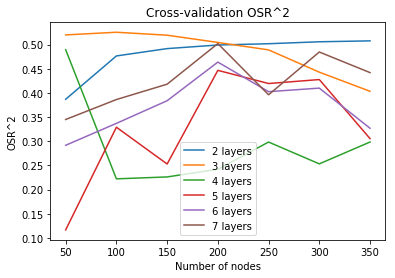

In [53]:
# Since the best result is obtained for 40 components, we only plot the model with 40 components.
plt.plot(range(50, 400, 50), grid.cv_results_['mean_test_score'].reshape(6,7,5)[:,:,3].transpose())
plt.legend([str(x) + ' layers' for x in range(2, 8)])
plt.xlabel('Number of nodes')
plt.ylabel('OSR^2')
plt.title('Cross-validation OSR^2')
plt.show()

In [54]:
y_pred = grid.predict(X_test)

print('OSR2 on test data: ', grid.score(X_test, y_test))
print('MAE on test data: ', mean_absolute_error(y_test, y_pred))
print('RMSE on test data: ', np.sqrt(mean_squared_error(y_test, y_pred)))

OSR2 on test data:  0.49003961684795716
MAE on test data:  28818310.37735031
RMSE on test data:  48720018.13597776
